In [1]:
# Algorithm Google Trading Strategy with Machine Learning


In [3]:
# import_statements

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
# plt.style.use("dark_background")
# plt.style.use('classic')
# using the style for the plot
plt.style.use('Solarize_Light2')


In [4]:
# load and read the file
df = pd.read_csv("GOOG.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,133.284500,135.640503,132.825256,134.891006,134.891006,29676000
1,2022-03-01,134.479996,136.110992,133.378494,134.167999,134.167999,24640000
2,2022-03-02,134.608246,135.615494,133.432495,134.751495,134.751495,23966000
3,2022-03-03,135.978500,136.713806,133.431000,134.307999,134.307999,19780000
4,2022-03-04,133.382507,134.199005,130.408493,132.121994,132.121994,24446000
...,...,...,...,...,...,...,...
245,2023-02-17,95.070000,95.750000,93.449997,94.589996,94.589996,31074100
246,2023-02-21,93.239998,93.415001,92.000000,92.050003,92.050003,28367200
247,2023-02-22,91.933998,92.360001,90.870003,91.800003,91.800003,29891100
248,2023-02-23,92.129997,92.129997,90.010002,91.070000,91.070000,32423700


In [5]:
# PRELIMINARY DATA EXPLORATION


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,133.284500,135.640503,132.825256,134.891006,134.891006,29676000
1,2022-03-01,134.479996,136.110992,133.378494,134.167999,134.167999,24640000
2,2022-03-02,134.608246,135.615494,133.432495,134.751495,134.751495,23966000
3,2022-03-03,135.978500,136.713806,133.431000,134.307999,134.307999,19780000
4,2022-03-04,133.382507,134.199005,130.408493,132.121994,132.121994,24446000


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2023-02-17,95.070000,95.750000,93.449997,94.589996,94.589996,31074100
246,2023-02-21,93.239998,93.415001,92.000000,92.050003,92.050003,28367200
247,2023-02-22,91.933998,92.360001,90.870003,91.800003,91.800003,29891100
248,2023-02-23,92.129997,92.129997,90.010002,91.070000,91.070000,32423700
249,2023-02-24,89.629997,90.129997,88.860001,89.349998,89.349998,31276600


In [8]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
df.duplicated().any()

False

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
# there is no NAN and no duplicated value

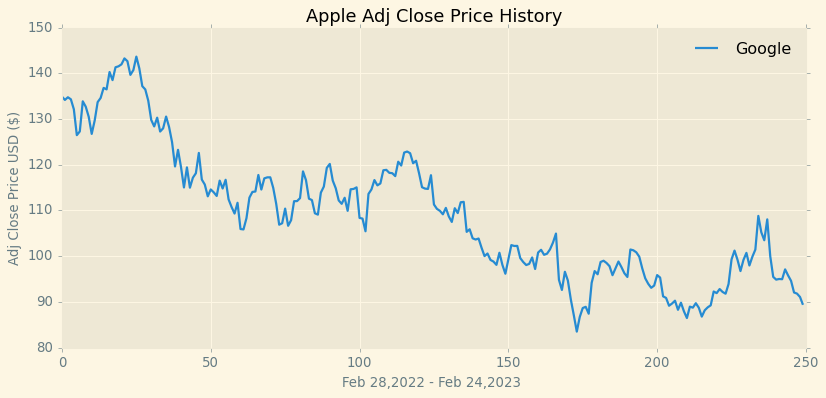

In [12]:
# visualize our data

plt.figure(figsize=(12, 5))
plt.plot(df['Adj Close'], label='Google')
plt.title('Apple Adj Close Price History')
plt.xlabel("Feb 28,2022 - Feb 24,2023 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper right")
plt.show()

In [13]:
# simple moving average with window n= 30 days
# using rollign mean pandas method

sma_30 = pd.DataFrame()
sma_30['Adj Close'] = df['Adj Close'].rolling(window=30).mean()
sma_30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
245,96.994667
246,97.124334
247,97.224334
248,97.285334


In [14]:
# simple moving average with window n=100 days
# using rollign mean pandas method

sma_100 = pd.DataFrame()
sma_100['Adj Close'] = df['Adj Close'].rolling(window=100).mean()
sma_100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
245,95.8060
246,95.7456
247,95.6562
248,95.5860


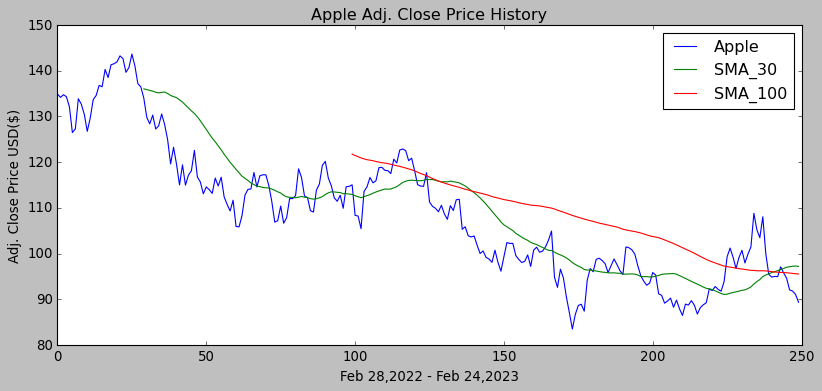

In [16]:
# graphical representation of our new data

plt.style.use('classic')

plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'], label='Apple')
plt.plot(sma_30['Adj Close'], label='SMA_30')
plt.plot(sma_100['Adj Close'], label='SMA_100')
plt.title("Apple Adj. Close Price History")
plt.xlabel('Feb 28,2022 - Feb 24,2023')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper right')
plt.show()

In [17]:
# Let's store our data in a new dataframe

new_df = pd.DataFrame()
new_df['google'] = df['Adj Close']
new_df['SMA_30'] = sma_30['Adj Close']
new_df['SMA_100'] = sma_100['Adj Close']
new_df

,google,SMA_30,SMA_100
0,134.891006,NaN,NaN
1,134.167999,NaN,NaN
2,134.751495,NaN,NaN
3,134.307999,NaN,NaN
4,132.121994,NaN,NaN
...,...,...,...
245,94.589996,96.994667,95.8060
246,92.050003,97.124334,95.7456
247,91.800003,97.224334,95.6562
248,91.070000,97.285334,95.5860


In [19]:
# Creating the signal function to predict when we should buy or sell action

def buySell(new_df):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(new_df)):
    if new_df ['SMA_30'][i] > new_df['SMA_100'][i]:
      if flag != 1:
        sigPriceBuy.append(new_df['google'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif new_df['SMA_30'][i] < new_df['SMA_100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(new_df['google'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)
buySell = buySell(new_df)


In [20]:
new_df['Buy Signal Price'] = buySell[0]
new_df['Sell Signal Price'] = buySell[1]


In [21]:
# show our data
new_df

,google,SMA_30,SMA_100,Buy Signal Price,Sell Signal Price
0,134.891006,NaN,NaN,NaN,NaN
1,134.167999,NaN,NaN,NaN,NaN
2,134.751495,NaN,NaN,NaN,NaN
3,134.307999,NaN,NaN,NaN,NaN
4,132.121994,NaN,NaN,NaN,NaN
...,...,...,...,...,...
245,94.589996,96.994667,95.8060,NaN,NaN
246,92.050003,97.124334,95.7456,NaN,NaN
247,91.800003,97.224334,95.6562,NaN,NaN
248,91.070000,97.285334,95.5860,NaN,NaN


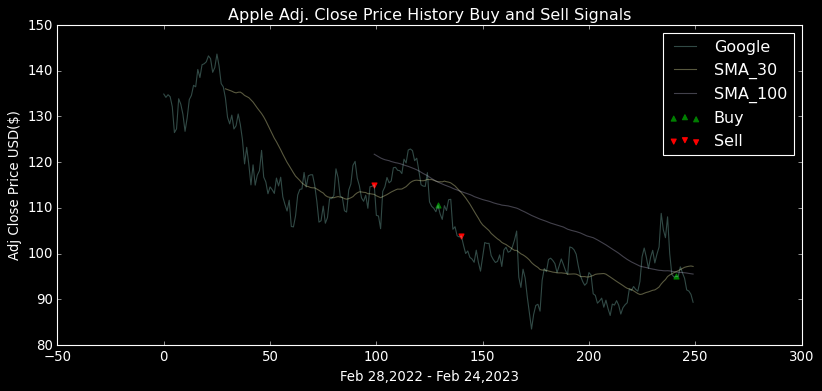

In [22]:
# graphical representation of when we should buy or sell a stock

plt.style.use("dark_background")
plt.figure(figsize=(12,5))
plt.plot(new_df['google'], label='Google', alpha=0.35)
plt.plot(new_df['SMA_30'], label='SMA_30', alpha=0.35)
plt.plot(new_df['SMA_100'],label='SMA_100', alpha=0.35)
plt.scatter(new_df.index, new_df['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(new_df.index, new_df['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel("Feb 28,2022 - Feb 24,2023")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper right')
plt.show()